<a href="https://colab.research.google.com/github/lahfidhiba/The-Coding-School/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

from google.colab import drive
fraud_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/synthetic_fraud_dataset.csv')

Did you know that globally, there are an estimated 1.51 million credit card transactions per minute?  It’s safe to assume that transactions play a major role in the lives of citizens across the globe. However, many of these transactions will eventually be labeled as fraud. According  to "Strip.com," a transaction is fraudulent when it's "unauthorized or illegal involving the use of payment instruments or financial systems” (Strip.com)

Banks can get very busy at times, and dealing with fraudulent transactions might overwhelm their system. Therefore, I developed my research questions: What was the main feature that banks can use to detect whether transactions are fraudulent? I explored a dataset that contained different features  that contributed to a transaction b

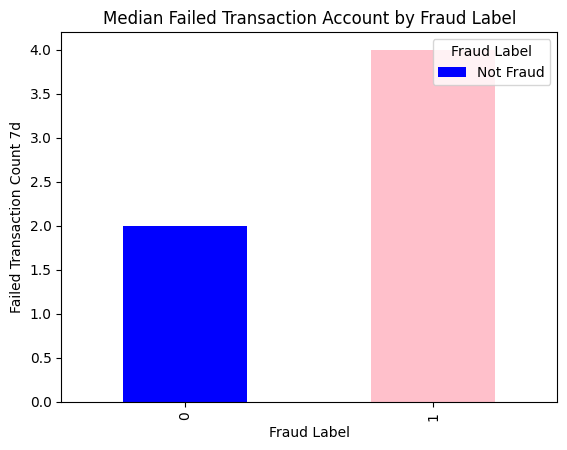

In [8]:
median_scores = fraud_df.groupby("Fraud_Label")["Failed_Transaction_Count_7d"].median()
median_scores.plot(kind='bar', color = ['blue', 'pink'])
labels = ['Fraud', 'Not Fraud']
plt.title("Median Failed Transaction Account by Fraud Label")
plt.xlabel("Fraud Label")
plt.ylabel("Failed Transaction Count 7d")
plt.legend(['Not Fraud', 'Fraud'], loc='upper right', title='Fraud Label')
plt.show()

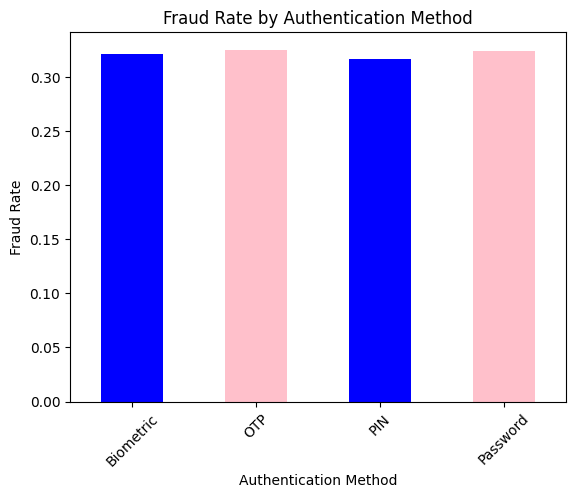

In [11]:
mean_scores = fraud_df.groupby('Authentication_Method')['Fraud_Label'].mean()
mean_scores.plot(kind='bar', color = ['blue', 'pink'])
labels = ['Fraud', 'Not Fraud']
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Authentication Method')
plt.xticks(rotation=45)
plt.show()

In [20]:
numeric_df=fraud_df.select_dtypes(include=["number"])


In [21]:
correlation= numeric_df.corr()

In [23]:
correlation_with_target = correlation["Fraud_Label"].abs().sort_values(ascending=False)
print(correlation_with_target)

Fraud_Label                     1.000000
Failed_Transaction_Count_7d     0.509871
Risk_Score                      0.385810
Daily_Transaction_Count         0.007065
Account_Balance                 0.003153
Card_Age                        0.003120
IP_Address_Flag                 0.003028
Transaction_Amount              0.001901
Previous_Fraudulent_Activity    0.000718
Avg_Transaction_Amount_7d       0.000703
Transaction_Distance            0.000116
Is_Weekend                      0.000064
Name: Fraud_Label, dtype: float64


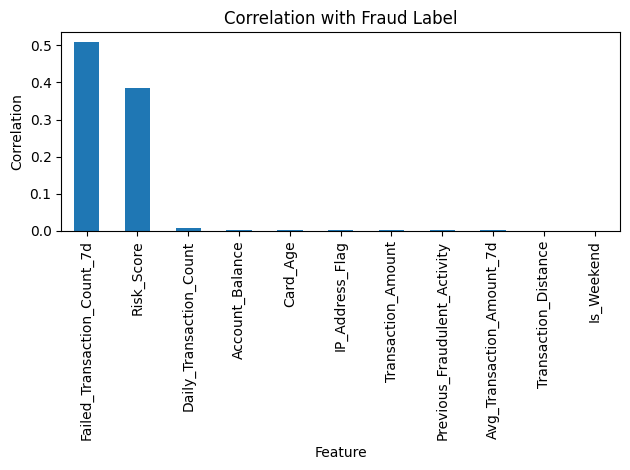

In [24]:
correlation_with_target.drop("Fraud_Label").plot(kind='bar')
plt.title("Correlation with Fraud Label")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

Using this code, I compared different variables to the Fraud Label. I found out that the failed transaction count within the last 7 days has the greatest correlation.

**Final Research Question**

What is the one feature that banks should look out for to reduce fraudulent transactions in the future? What can a bank do?

**Hypothesis Testing**

In [12]:
    import pandas as pd
    from scipy.stats import ttest_ind

In [14]:
group_1 = fraud_df[fraud_df["Fraud_Label"] == 0]["Failed_Transaction_Count_7d"]
group_2 = fraud_df[fraud_df["Fraud_Label"] == 1]["Failed_Transaction_Count_7d"]

In [15]:
t_stat, p_val = ttest_ind(group_1, group_2)
print(p_val)

0.0


In [16]:
print(t_stat)

-132.52926343063783


The P-Value is <0.05, meaning that there is strong evidence against the hypothesis.​

The negative T-value indicates a difference in failed transaction counts between the two Fraud Label groups (fraud and non-fraud)​

**Machine Learning Model**

For my machine learning model, I chose to go with a logistic regression to predict whether transactions would be fraudulent based on the failed transaction variable because it predicts a binary classification, and that was the output for my research.

In [25]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9579
Precision: 0.9328
Recall: 0.9865
F1-score: 0.9589


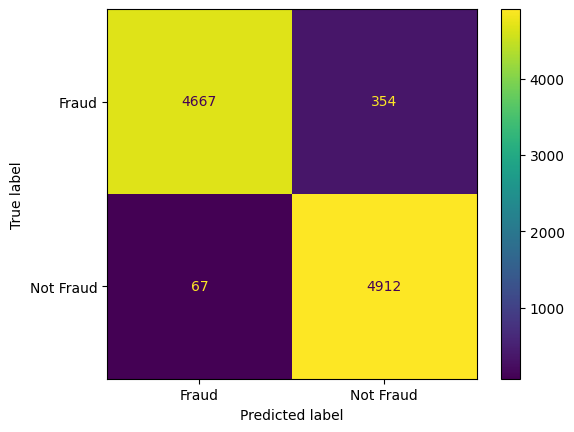

In [50]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ["Fraud","Not Fraud"])
plt.show()

However, my data was a little imbalanced, so I had to balance it out.

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [52]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X = fraud_df[["Failed_Transaction_Count_7d"]]
y = fraud_df["Fraud_Label"]

X_resampled, y_resampled = undersampler.fit_resample(X.values.reshape(-1,1), y)

In [53]:
print("Original class distribution:", Counter(y))
print("New class distribution after undersampling:", Counter(y_resampled))

Original class distribution: Counter({0: 33933, 1: 16067})
New class distribution after undersampling: Counter({0: 16067, 1: 16067})


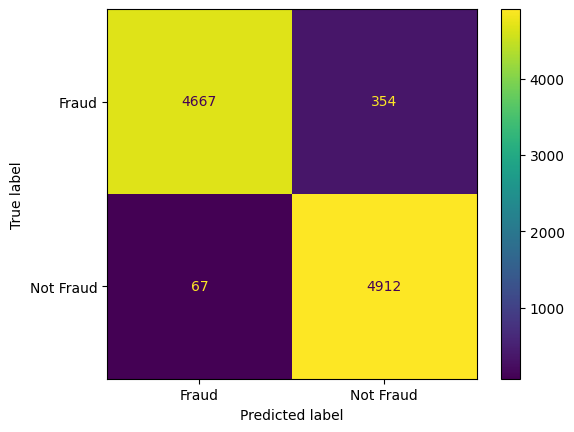

In [54]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = ["Fraud","Not Fraud"])
plt.show()

The confusion matrix didn't change because the data wasn't extremely imbalanced.

**CLOSING**

In conclusion, using this research, there is no doubt that banks across the country should pay attention to a user's failed transaction count within the past week. The logistic regression developed could help cut down costs for banks to recognize transactions that are most likely fraudulent using this feature. For example, if the model recognizes a transaction as fraudulent, it should immediately alert the owner of the account and shut down the card for security purposes.